PT 1:

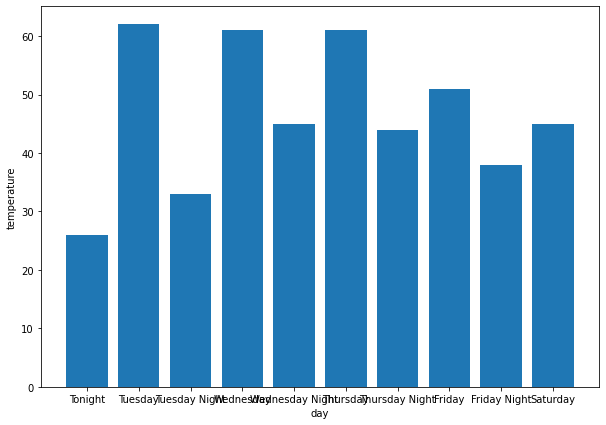

In [17]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#41.5048° N, 73.9696° W

lat = "41.5048"
lon ='-73.9696'

weather = open('weather.csv',"w",newline="",encoding="utf-8")
csv_write = csv.writer(weather)
csv_write.writerow(['day','temperature','weather description'])
page = 1

genius =  requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
forecast = json_file['properties']['forecast']
new_request = requests.get(forecast)

json = new_request.json()
json

prop = json['properties']

period = prop['periods']

for i in period:
    day = i['name']
    #print(day)
    temp = i['temperature']
    #print(temp)
    descforecast = i['detailedForecast']
    #print(descforecast)
    
    csv_write.writerow([day,temp,descforecast])


    
weatherdata = pd.read_csv('weather.csv')
weather_df = pd.DataFrame(weatherdata)

day = weather_df['day']
temp = weather_df['temperature']

graph = plt.figure(figsize = (10,7))
plt.bar(day[0:10],temp[0:10])

plt.xlabel("day")
plt.ylabel("temperature")

plt.show()

PT2:

In [70]:
import requests
import json

#a bunch of countries i want to go to (out of basically all of them)
costarica = 'CR'
denmark = "DK"
ecuador = "EC"
france = "FR"
germany = "DE"
greece = "GR"
greenland = "GL"
india = "IN"
israel = "IL"
japan = "JP"
laos = "LA"
mexico = "MX"
mongolia = 'MN'
newzealand = "NZ"
vietnam = "VN"



#the /AvailableCountries call returns the entire API dictionary of different countrie's letter codes and names
allcountries = requests.get('https://date.nager.at/api/v3/AvailableCountries')
allcountries.json()


#countryinfo takes the country code and returns a more detailed dictionary of all relevant info, including the bordering countries
info = requests.get(f"https://date.nager.at/api/v3/Countryinfo/{greece}")
info.json()

#this longweekend request takes both the country code and year as arguments, and outputs all start date,
#end date, and lengths in a list of dictionaries
longweekend = requests.get(f"https://date.nager.at/api/v3/LongWeekend/{2015}/{newzealand}")
longweekend.json()

#this holiday request names all of the dates and types of holidays in a given year for the 
#specified country, again via two arguments
holiday = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{2009}/{costarica}")
holiday.json()


#this checks whether today is a public holiday or not, and takes the country code. 
# the response is either 200 = YES, or 204 = NO, which means that this could be used in a conditional
#loop to output a yes/no or true/false
today = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/{laos}")
today


#this returns all holidays coming within the next year as a dictionary, with the date, local name
#in the main language, and other details
nextholiday = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{mexico}")
nextholiday.json()


#this call takes no arguments and just returns the next 7 days' holidays from every country
worldnext = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
worldnext.json()




[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

PT3:

In [95]:
import json
import requests

costarica = 'CR'
denmark = "DK"
ecuador = "EC"
france = "FR"
germany = "DE"
greece = "GR"
greenland = "GL"
india = "IN"
israel = "IL"
japan = "JP"
laos = "LA"
mexico = "MX"
mongolia = 'MN'
newzealand = "NZ"
vietnam = "VN"

holi = open('holidayscount.csv',"w",newline="",encoding="utf-8")
csv_write = csv.writer(holi)
csv_write.writerow(['country'])

countries = [costarica, denmark, ecuador, france, germany, greenland, israel, japan, india, mongolia]

for i in countries:
    holiday = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2021/{i}")
    count = 0
    for x in holiday:
        count += 1
        
count



15